#                            EMOTION RECOGNITION USING SPEECH

## Introduction

The bottom line objective of this project is to classify the emotions of people with the help of speech. 
Speech is the most natural way of expressing ourselves as humans. This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.

## Librosa

The most important python library which is used for the whole project is Librosa. It is used for analyzing audio and music. It has a flatter package layout, standardizes interfaces and names, backwards compatibility, modular functions, and readable code

## Dataset 

The dataset used for this project is RAVDESS. this is the Ryerson Audio-Visual Database of Emotional Speech and Song dataset, and is free to download. This dataset has 7356 files rated by 247 individuals 10 times on emotional validity, intensity, and genuineness.<br>
In the RAVDESS, there are two types of data: speech and song.<br>
The database contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral    North American accent. Speech includes calm, happy, sad, angry, fearful, surprise, and disgust expressions, and song contains calm, happy, sad, angry, and fearful emotions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.<br>
Here, we are using only the speech data and you can download the dataset from this link https://zenodo.org/record/1188976#.XwTpxShKjIV. The zip file used in this project is 'Audio_Speech_Actors_01-24.zip'.<br> 
The files in this dataset follow a particular convention which itself labels the data.

### Filename identifiers 

1. Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
2. Vocal channel (01 = speech, 02 = song).
3. Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
4. Emotional intensity (01 = normal, 02 = strong). 
5. Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
6. Repetition (01 = 1st repetition, 02 = 2nd repetition).

NOTE: There is no strong intensity for the 'neutral' emotion.
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


## Process Flow

This project can be done in these four steps
1. Data processing: The collection and manipulation of items of data to produce meaningful information.
2. Feature extraction: Feature extraction is a process of dimensionality reduction by which an initial set of raw data is reduced to more manageable groups for processing.
3. Building a model: A Multi Layer Perceptron model is built for classifying the emotions. 
4. Testing the model: Testing the built model on a new set of data.

#### Importing the necessary libraries 

In [3]:
import os
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import IPython.display as ipd #for the audio signal display
from sklearn.neural_network import MLPClassifier #Multi Layer Perceptron Classifier
from sklearn.metrics import accuracy_score #For testing the accuracy of the model
from sklearn.model_selection import train_test_split #Splitting the dataset
from sklearn import metrics

## Data Preparation

The files in the data set are in the above mentioned format. So, these files should be extracted to a data frame along with the labels

In [5]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
gender=[]
emotion=[]
for file in glob.glob("C:/Users/Owner/Downloads/RAVDESS/Actor_*/*.wav"):
        file_name=os.path.basename(file) #grabbing the filename from the path
        temp=emotions[file_name.split("-")[2]] #grabbing the emotion from the filename
        emotion.append(temp)
        temp=int(file_name.split("-")[5]) #grabbing the gender from the filename
        if temp%2 == 0:
            temp="female"
        else:
            temp="male"
        gender.append(temp)

In [7]:
temp1=pd.DataFrame(emotion) #creating a temporary dataframe for emotion
temp2=pd.DataFrame(gender) #creating a temporary dataframe for gender
df=pd.concat([temp2,temp1],axis=1) #concatinating two dataframes
df.columns=['gender','emotion']
df['gender_emotion'] =df.gender + '_' + df.emotion #concatinating the gender and emotion
df.head()

,gender,emotion,gender_emotion
0,male,neutral,male_neutral
1,female,neutral,female_neutral
2,male,neutral,male_neutral
3,female,neutral,female_neutral
4,male,calm,male_calm


In [8]:
print(df.gender_emotion.value_counts())

male_fearful        96
male_calm           96
male_sad            96
female_happy        96
female_disgust      96
male_surprised      96
female_sad          96
female_fearful      96
female_calm         96
male_happy          96
female_surprised    96
male_disgust        96
female_angry        96
male_angry          96
male_neutral        48
female_neutral      48
Name: gender_emotion, dtype: int64


## Feature extraction

Let us consider a single audio signal and extract some features from that signal

Text(0.5, 1.0, 'Audio signal')

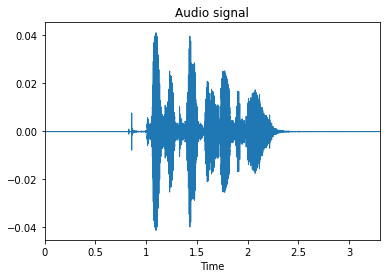

In [9]:
voice,sr = librosa.load("C:/Users/Owner/Downloads/RAVDESS/Actor_01/03-01-01-01-01-01-01.wav")
librosa.display.waveplot(voice, sr=sr)
plt.title('Audio signal')

Librosa library is used to extract an audio signal from the .wav file.This is how an audio signal looks in time domain